In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

total_df = [train_df, test_df]        #Both train & test datasets are combined in one list to compute together where needed.

In [3]:
print("Shape of training dataset: {}".format(train_df.shape))
print("Shape of test dataset: {}".format(test_df.shape))

Shape of training dataset: (891, 12)
Shape of test dataset: (418, 11)


In [4]:
print("Training set columns: {}".format(train_df.columns))
print('\n')
print("Test set columns: {}".format(test_df.columns))

Training set columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Test set columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Looking at the data types

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Checking Statistics of the features

In [9]:
# Checking Statistics of the Numerical Features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Checking Statistics of Categorical Features

train_df.describe(include=['O'])            #To select pandas categorical columns, pass include=['O'] as describe() arg.

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johnson, Master. Harold Theodor",male,347082,B96 B98,S
freq,1,577,7,4,644


### Checking for null values

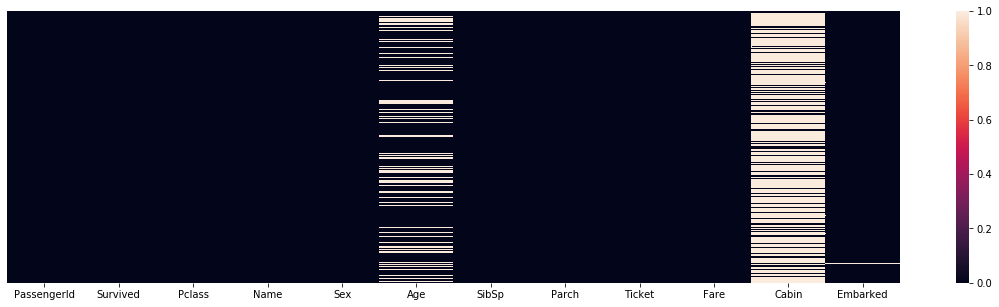

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(train_df.isnull(), yticklabels=False)

#### Looks like 'Cabin' has the most null values, followed by 'Age' and few in 'Embarked'.

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Feature Analysis

male      577
female    314
Name: Sex, dtype: int64

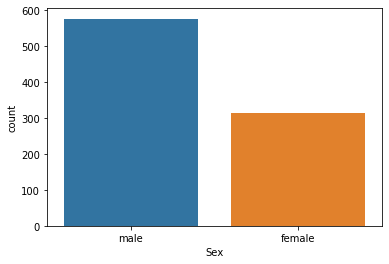

In [14]:
sex_div = train_df['Sex'].value_counts()
sns.countplot(train_df['Sex'])
sex_div

0    549
1    342
Name: Survived, dtype: int64

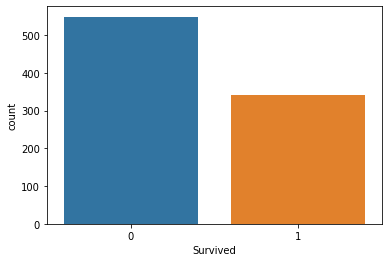

In [15]:
#How many people survived?
sns.countplot(x='Survived', data=train_df)
train_df['Survived'].value_counts()          # 1 => Survived & 0 => Did Not Survive

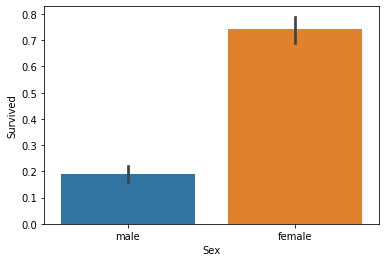

In [16]:
sns.barplot(y='Survived', x='Sex', data=train_df)

#### More female survivors in the training dataset.

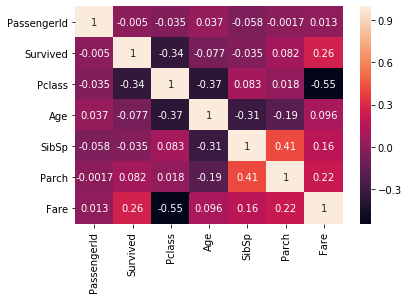

In [17]:
sns.heatmap(train_df.corr(),annot=True)

In [18]:
train_df.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [19]:
# Analyzing relation between features and the Target feature - Survived.
# Trying with the categorical features which dont have missing values.

In [20]:
train_df[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [21]:
train_df[['Sex','Survived']].groupby('Sex').mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [22]:
train_df[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived',ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [23]:
train_df[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


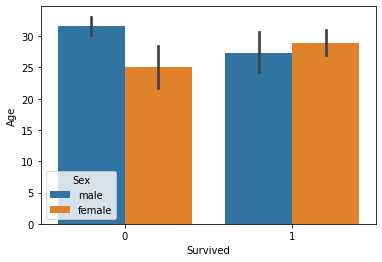

In [24]:
sns.barplot(x='Survived', y='Age', hue='Sex', data=train_df)

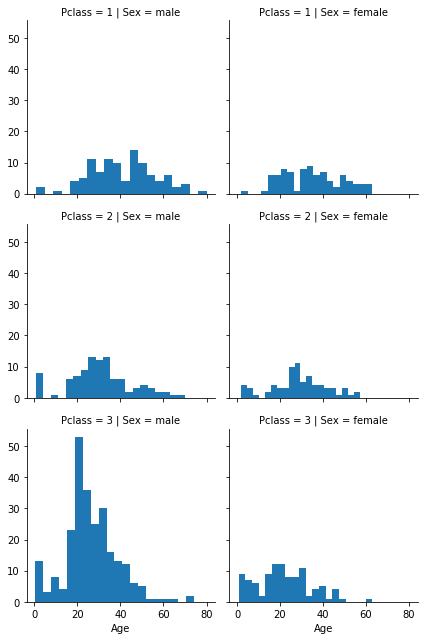

In [25]:
x = sns.FacetGrid(row='Pclass', col='Sex', data=train_df)
#x.map(plt.hist,'Age')
#x.map(plt.hist,'Age', bins=30)

x.map(plt.hist,'Age', bins=20)


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


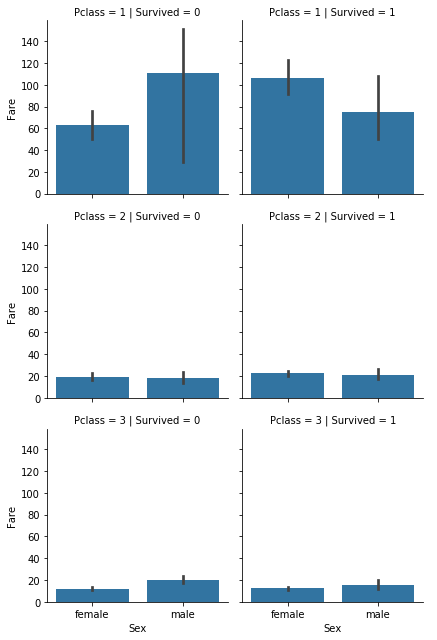

In [26]:
#y = sns.FacetGrid(data=train_df, row = 'Survived')
#y = sns.FacetGrid(data=train_df, col = 'Survived')

y = sns.FacetGrid(data=train_df, col = 'Survived', row = 'Pclass')
y.map(sns.barplot, 'Sex', 'Fare')
y.add_legend()

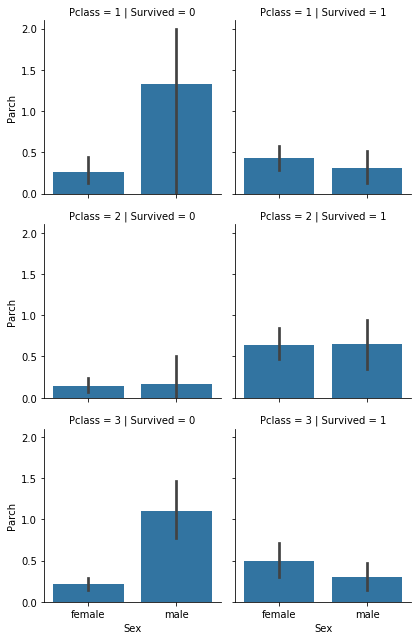

In [27]:
z = sns.FacetGrid(data=train_df, col = 'Survived', row = 'Pclass')
z.map(sns.barplot, 'Sex','Parch')
#z.add_legend()

## Data Preprocessing

In [28]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Feature: 'Ticket' and 'Cabin' 

In [29]:
# Cabin & Ticket can be dropped. Cabin has too many null values in it.

train_df = train_df.drop(['Ticket','Cabin'], axis=1)
test_df = test_df.drop(['Ticket','Cabin'], axis=1)
total_df = [train_df, test_df]

In [30]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C


In [31]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S


### Feature: 'Sex'

In [32]:
# Replacing the male and female values in the Sex feature with 0 & 1 respectively.
s_dic = {'male': 0 ,'female': 1}

for d in total_df:
    d['Sex'] = d['Sex'].map(s_dic).astype(int)

In [33]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


### Feature: 'Name'

In [34]:
# Creating a new Feature which will project the Title of the Name only.

#train_df['Title'] = train_df['Name'].str.split('.')[0].split(',')[1]
#train_df['Title']

for m in total_df:
    m["Title"] = train_df['Name'].str.extract(' ([a-zA-Z]+)\. ', expand=False) # Using Regex to extract title.

In [35]:
# Drop the Name Feature from both the data frames
for m in total_df:
    m.drop('Name', axis=1, inplace=True) 

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,Mr
1,2,1,1,1,38.0,1,0,71.2833,C,Mrs
2,3,1,3,1,26.0,0,0,7.9250,S,Miss
3,4,1,1,1,35.0,1,0,53.1000,S,Mrs
4,5,0,3,0,35.0,0,0,8.0500,S,Mr


In [37]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Don           1
Ms            1
Lady          1
Jonkheer      1
Countess      1
Mme           1
Sir           1
Capt          1
Name: Title, dtype: int64

In [38]:
test_df['Title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Rev         3
Dr          3
Mme         1
Don         1
Name: Title, dtype: int64

In [39]:
## Other than Mr, Mrs, Master & Miss, the rest can be classified as 'Others'

train_df["Title"] = train_df['Title'].replace(['Dr','Rev','Mlle','Major','Col','Countess','Jonkheer','Lady','Sir','Ms',
                                               'Mme','Don','Capt'],'Others')
train_df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title, dtype: int64

In [40]:
test_df['Title'] = test_df['Title'].replace(['Dr','Rev','Don','Mme'], 'Others')
test_df['Title'].value_counts()

Mr        228
Miss      101
Mrs        58
Master     23
Others      8
Name: Title, dtype: int64

In [41]:
train_df[['Title','Survived']].groupby('Title').mean().sort_values(by='Title',ascending=False)

,Survived
Title,
Others,0.444444
Mrs,0.792000
Mr,0.156673
Miss,0.697802
Master,0.575000


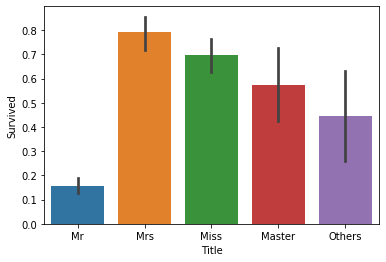

In [42]:
sns.barplot(x="Title", y='Survived', data=train_df)

In [43]:
#test_df.drop('title', axis=1, inplace=True)
#test_df.head(1)

In [44]:
# Converting these categories to ordinal values
t_dict = {'Mr':1, "Miss":2, "Mrs":3, "Master":4, "Others":5}

train_df['Title'] = train_df['Title'].map(t_dict)
test_df['Title'] = test_df['Title'].map(t_dict)



In [45]:
print('Null in Train set {}'.format(train_df['Title'].isnull().sum()))
print('Null In Test set {}'.format(test_df['Title'].isnull().sum()))

Null in Train set 0
Null In Test set 0


In [46]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1
5,6,0,3,0,NaN,0,0,8.4583,Q,1
6,7,0,1,0,54.0,0,0,51.8625,S,1
7,8,0,3,0,2.0,3,1,21.0750,S,4
8,9,1,3,1,27.0,0,2,11.1333,S,3
9,10,1,2,1,14.0,1,0,30.0708,C,3


In [47]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,34.5,0,0,7.8292,Q,1
1,893,3,1,47.0,1,0,7.0000,S,3
2,894,2,0,62.0,0,0,9.6875,Q,2
3,895,3,0,27.0,0,0,8.6625,S,3
4,896,3,1,22.0,1,1,12.2875,S,1
5,897,3,0,14.0,0,0,9.2250,S,1
6,898,3,1,30.0,0,0,7.6292,Q,1
7,899,2,0,26.0,1,1,29.0000,S,4
8,900,3,1,18.0,0,0,7.2292,C,3
9,901,3,0,21.0,2,0,24.1500,S,3


### Feature: Age

In [48]:
train_df[['Pclass','Age']].groupby('Pclass').mean().sort_values(by='Pclass',ascending=False)

,Age
Pclass,
3,25.140620
2,29.877630
1,38.233441


In [49]:
train_df['Age'].isnull().sum()  # We will replace the missing ages with the mean age in the 3 classes.

177

In [50]:
train_df[train_df['Age'].isnull()].head(10)   # Checking which rows have null Age.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,6,0,3,0,NaN,0,0,8.4583,Q,1
17,18,1,2,0,NaN,0,0,13.0000,S,1
19,20,1,3,1,NaN,0,0,7.2250,C,3
26,27,0,3,0,NaN,0,0,7.2250,C,1
28,29,1,3,1,NaN,0,0,7.8792,Q,2
29,30,0,3,0,NaN,0,0,7.8958,S,1
31,32,1,1,1,NaN,1,0,146.5208,C,3
32,33,1,3,1,NaN,0,0,7.7500,Q,2
36,37,1,3,0,NaN,0,0,7.2292,C,1
42,43,0,3,0,NaN,0,0,7.8958,C,1


In [51]:
#pc1_mean = 38.233441
#pc2_mean = 29.877630
#pc3_mean = 25.140620

#for i in range(len(train_df)):
#    if (train_df['Age'].empty) & (train_df['Pclass']==1):
#        train_df['Age'].fillna(pc1_mean)
#    elif (train_df['Age'].empty) & (train_df['Pclass']==2):
#        train_df['Age'].fillna(pc2_mean)
#    elif (train_df['Age'].empty) & (train_df['Pclass']==3):
#        train_df['Age'].fillna(pc3_mean)
#-------------------------------------------------------------


#train_df["Age"].fillna(train_df[['Pclass','Age']].groupby('Pclass').transform('mean'))

#train_df.groupby('Pclass')['Age'].mean() --- Not Ok
##train_df.groupby('Pclass')['Age'].transform(mean) <--- OK -- (Ref Pandas Doc)


train_df["Age"].fillna(train_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)
test_df["Age"].fillna(train_df.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [52]:
train_df.iloc[[5,17,19,31]]   # Checking whether the rows with nul values are filled or not.

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
5,6,0,3,0,25.140620,0,0,8.4583,Q,1
17,18,1,2,0,29.877630,0,0,13.0000,S,1
19,20,1,3,1,25.140620,0,0,7.2250,C,3
31,32,1,1,1,38.233441,1,0,146.5208,C,3


In [53]:
train_df['Age'].isnull().sum()  # No null values present in Age feature anymore.

0

In [54]:
test_df['Age'].isnull().sum()  # No null values present in Age feature anymore.

0

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [56]:
# Changing the Age Feature to ordinal value considering them to be in ranges
#for d in total_df:    
#   d.loc[d['Age'] <= 16, 'Age'] = 0
#   d.loc[(d['Age'] > 16) & (d['Age'] <= 32), 'Age'] = 1
#   d.loc[(d['Age'] > 32) & (d['Age'] <= 48), 'Age'] = 2
#   d.loc[(d['Age'] > 48) & (d['Age'] <= 64), 'Age'] = 3
#   d.loc[d['Age'] > 64, 'Age']




#if (train_df['Age'] <= 16):
#    train_df['Age'] == 0
#elif (train_df['Age'] > 16 & train_df['Age'] <= 32)
#    train_df['Age'] == 1
#elif (train_df['Age'] > 32 & train_df['Age'] <= 48)
#    train_df['Age'] == 2
#elif (train_df['Age'] > 48 & train_df['Age'] <= 64)
#    train_df['Age'] == 3 


#train_df

In [57]:
#train_df[train_df['Age']>64]
#train_df['Age'].unique()

In [58]:
#from sklearn.preprocessing import MinMaxScaler

In [59]:
#sc = MinMaxScaler()
#sc.fit_transform(train_df[['Age']])


In [60]:
#train_df['Age'].describe()

### Feature: SibSp and Parch

#### SibSp & Parch constitute a family. Hence a new feature of FamilySize can be created. 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


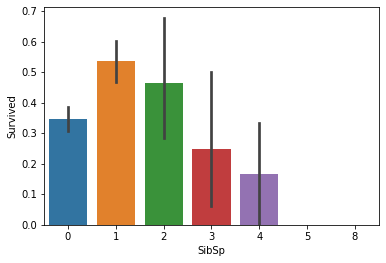

In [61]:
print(train_df['SibSp'].value_counts())
sns.barplot(data=train_df, x='SibSp', y='Survived')

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


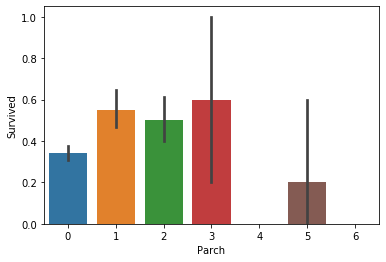

In [62]:
print(train_df['Parch'].value_counts())
sns.barplot(data=train_df, x='Parch', y='Survived')

In [63]:
train_df['FamilySize'] = train_df['Parch'] + train_df['SibSp'] + 1  # (+1 is for self and then 2 types of family members \
test_df['FamilySize'] = test_df['Parch'] + test_df['SibSp'] + 1     #  Parch and SibSp.)

In [64]:
train_df[['FamilySize','Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


In [65]:
train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,1,0,7.25,S,1,2


In [66]:
test_df.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,0,34.5,0,0,7.8292,Q,1,1


In [67]:
# Drop Parch & SibSp as they are now represented by FamilySize.

train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
total_df = [train_df, test_df]

train_df.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,7.25,S,1,2


In [68]:
test_df.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,34.5,7.8292,Q,1,1


### Feature: Embarked

In [69]:
# Embarked has 2 null values in the training set. This can be filled with the most commonly occuring category, ie MODE

max_mode = train_df['Embarked'].mode()
max_mode


0    S
dtype: object

In [70]:
train_df['Embarked'] = train_df['Embarked'].fillna('S')
test_df['Embarked'] = test_df['Embarked'].fillna('S')
total_df = [train_df, test_df]

In [71]:
train_df["Embarked"].isnull().sum()

0

In [72]:
test_df['Embarked'].isnull().sum()

0

#### Converting the Categorical feature to Numeric

In [73]:
train_df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
catd = {'S':0, 'C':1, 'Q':2}

for i in total_df:
    i['Embarked'] = i['Embarked'].map(catd).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,7.2500,0,1,2
1,2,1,1,1,38.0,71.2833,1,3,2
2,3,1,3,1,26.0,7.9250,0,2,1
3,4,1,1,1,35.0,53.1000,0,3,2
4,5,0,3,0,35.0,8.0500,0,1,1


In [75]:
train_df.tail()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
886,887,0,2,0,27.00000,13.00,0,5,1
887,888,1,1,1,19.00000,30.00,0,2,1
888,889,0,3,1,25.14062,23.45,0,2,4
889,890,1,1,0,26.00000,30.00,1,1,1
890,891,0,3,0,32.00000,7.75,2,1,1


In [76]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,34.5,7.8292,2,1,1
1,893,3,1,47.0,7.0000,0,3,2
2,894,2,0,62.0,9.6875,2,2,1
3,895,3,0,27.0,8.6625,0,3,1
4,896,3,1,22.0,12.2875,0,1,3


### Feature: Fare

In [77]:
train_df['Fare'].isnull().sum()

0

In [78]:
test_df['Fare'].isnull().sum() # test_df['Fare'] has 1 missing value which is filled with the max occuring value in train_df

1

In [79]:
train_df['Fare'].value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

In [80]:
test_df['Fare'] = test_df['Fare'].fillna(8.05)

In [81]:
test_df['Fare'].isnull().sum()

0

In [82]:
# Drop PassengerId in train_df

train_df.drop('PassengerId', axis=1, inplace=True)

test_df_passenger_id = test_df['PassengerId']  #"PassengerId" is stored in this variable for creating submission file, later.

test_df.drop('PassengerId', axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,22.0,7.2500,0,1,2
1,1,1,1,38.0,71.2833,1,3,2
2,1,3,1,26.0,7.9250,0,2,1
3,1,1,1,35.0,53.1000,0,3,2
4,0,3,0,35.0,8.0500,0,1,1


In [83]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,34.5,7.8292,2,1,1
1,3,1,47.0,7.0000,0,3,2
2,2,0,62.0,9.6875,2,2,1
3,3,0,27.0,8.6625,0,3,1
4,3,1,22.0,12.2875,0,1,3


### One Hot Encoding

In [84]:
#oh1_pclass = pd.get_dummies(train_df['Pclass'])
###oh1_sex = pd.get_dummies(train_df['Sex'])
#oh1_age = pd.get_dummies(train_df['Age'])
#oh1_embarked = pd.get_dummies(train_df['Embarked'])
#oh1_title = pd.get_dummies(train_df['Title'])
#oh1_familysize = pd.get_dummies(train_df['FamilySize'])

#oh2_pclass = pd.get_dummies(test_df['Pclass'])
###oh2_sex = pd.get_dummies(test_df['Sex'])
#oh2_age = pd.get_dummies(test_df['Age'])
#oh2_embarked = pd.get_dummies(test_df['Embarked'])
#oh2_title = pd.get_dummies(test_df['Title'])
#oh2_familysize = pd.get_dummies(test_df['FamilySize'])


#train_df = pd.concat([oh1_pclass,oh1_age,oh1_embarked,oh1_title,oh1_familysize,train_df], axis=1)
#test_df = pd.concat([oh2_pclass,oh2_age,oh2_embarked,oh2_title,oh2_familysize,test_df], axis=1)



In [85]:
#train_df.drop(['Pclass','Age','Embarked','Title','FamilySize'], axis=1, inplace=True)
#test_df.drop(['Pclass','Age','Embarked','Title','FamilySize'], axis=1, inplace=True)

### Model Building 

In [86]:
X_train = train_df.drop('Survived',axis=1)
y_train = train_df['Survived']

X_test = test_df

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [88]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.48

In [90]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_score = round(svc.score(X_train, y_train) * 100, 2)
svc_score

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


92.26

In [91]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_score = round(knn.score(X_train, y_train) * 100, 2)
knn_score

84.85

In [92]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score

80.58

In [93]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
lin_svc_score = round(linear_svc.score(X_train, y_train) * 100, 2)
lin_svc_score

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


64.53

In [94]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train) * 100, 2)
decision_tree_score

98.43

In [95]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
rand_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
rand_forest_score

98.43

### Model Scores

In [96]:
m_dict = {"MODEL": ['Logistic Regression', 'Support Vector Machines', 'KNN or k-Nearest Neighbors', 'Gaussian Naive Bayes',
                    'Linear SVC', 'Decision Tree', 'Random Forest' ],
         "SCORES in %": [logreg_score, svc_score, knn_score, gauss_score, lin_svc_score, 
                         decision_tree_score, rand_forest_score]}

sco = pd.DataFrame(m_dict)
sco.sort_values(by='SCORES in %', ascending=False)

,MODEL,SCORES in %
5,Decision Tree,98.43
6,Random Forest,98.43
1,Support Vector Machines,92.26
2,KNN or k-Nearest Neighbors,84.85
0,Logistic Regression,81.48
3,Gaussian Naive Bayes,80.58
4,Linear SVC,64.53


### From the above Scores table, it is observed that both Decision Tree and Random Forest models sores maximum with 98.43 %.

In [97]:
file = pd.DataFrame({"PassengerId": test_df_passenger_id, "Survived": y_pred})

file.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,0
7,899,1
8,900,1
9,901,0
